# <u>Current Population Survey Analysis
## Estimating the expected earnings of U.S. households

## Introduction:
A citizen’s wellbeing is an important factor that adds to the prosperity of a nation. A better wellbeing can mean a better society, so it is important for a government to know how well off their citizens are. However, wellbeing can be difficult to measure. Despite Income not being a perfect indicator of a citizen’s wellbeing, it is still an indicator which can be used to determine how well off a country is. Characteristics of a person can be a determinate of income and policy can effect these factor or even effect the level at which these factors have an effect on income. In this analysis, I look at the impact of a person’s age, gender, and education on their average hourly earnings using OLS regression in order to forecast expected earnings for individuals of different characteristics. These findings can better help a government understand the effect of factors which go into determining an individuals income and push government to make better political discussions when the goal of a policy might be to increase the average standard of living of the average citizen. So, the questions I will be answering is do Gender, Educations, and Age effect an Americans income and if so to what degree is that effect.

## <u> Data Description: 
The data set that this analysis will be using is data was provided by the Bureau of Labor Statistics via the "Current Population Survey" from 1992 to 2012. This Data table shows approximately 65,000 U.S. households and includes characteristics such as gender, Average Hourly Earnings (AHE), Education, age of participant, and the year the data was taken from. 

In [25]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [35]:
cps = pd.read_stata("cps92_12.dta")

### Summary of Variables being used:
Average hourly earnings: minimum hourly earnings is \\$1.24 and maximum is \\$ 91.46. With the average hourly earnings being $15.66. <br>
Bachelor: 0 if no bachelors degree and 1 if bachelors degree  <br>
Female: 0 if not female and 1 if female  <br>
Age: minimum age is 25 and maximum age is 34, average age is 29.68 <br>


In [76]:
summary = round(cps.describe(),2)
print(summary)

           year       ahe  bachelor    female       age
count  15052.00  15052.00  15052.00  15052.00  15052.00
mean    2001.89     15.66      0.46      0.43     29.68
std       10.00      9.44      0.50      0.49      2.82
min     1992.00      1.24      0.00      0.00     25.00
25%     1992.00      9.23      0.00      0.00     27.00
50%     1992.00     13.46      0.00      0.00     30.00
75%     2012.00     19.23      1.00      1.00     32.00
max     2012.00     91.46      1.00      1.00     34.00


### Relationship between Average Hourly Earnings and Age:

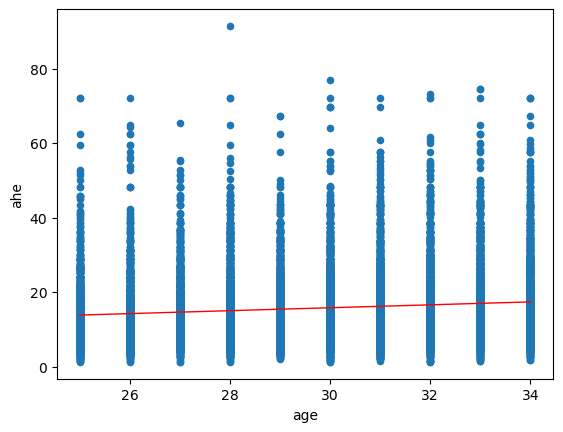

In [156]:
cps.plot( kind = 'scatter', x = 'age', y = 'ahe')
lmage = smf.ols("ahe ~ age", data = cps).fit()
xnew = pd.DataFrame({'age': [cps.age.min(),cps.age.max()]})
pred = lmage.predict(xnew)
plt.plot(xnew, pred, c = 'red', linewidth = 1)

### Relationship between Average Hourly Earnings and Gender:

Text(0.5, 0, 'Gender: 0.0 = Male, 1.0 = Female')

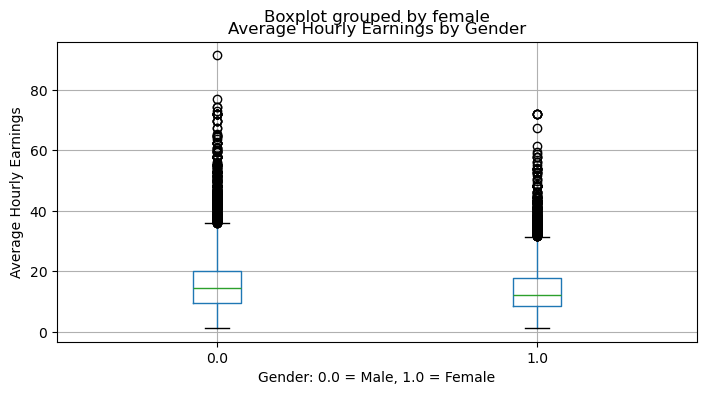

In [141]:
ax = cps.boxplot( column = "ahe", by = "female", figsize = (8,4))
ax.set_ylabel("Average Hourly Earnings")
ax.set_title("Average Hourly Earnings by Gender")
ax.set_xlabel("Gender: 0.0 = Male, 1.0 = Female")

### Relationship between Average Hourly Earnings and Education:

Text(0.5, 1.0, 'Average Hourly Earnings by College Degree')

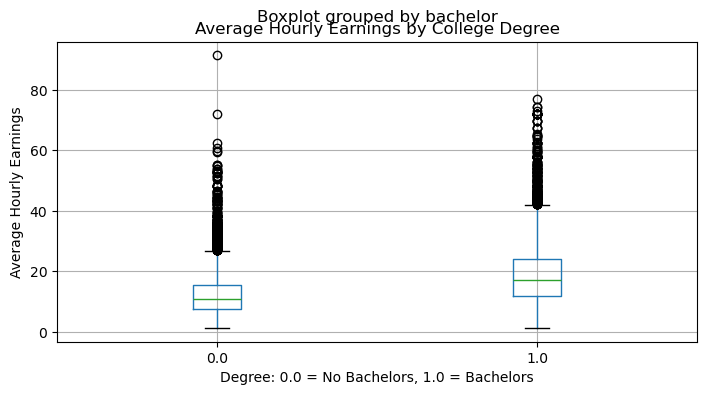

In [152]:
ac = cps.boxplot(column = "ahe", by = "bachelor", figsize = (8,4))
ac.set_ylabel("Average Hourly Earnings")
ac.set_xlabel("Degree: 0.0 = No Bachelors, 1.0 = Bachelors")
ac.set_title("Average Hourly Earnings by College Degree")

## <u>Empirical Approach:
I am asking whether age, gender, and education are determinants of average hourly earnings. I will be answering this question using OLS regression:
$\hat {AverageHourlyEarnings} = \hat\beta_0 + \hat\beta_1 Bachelor  + \hat\beta_2 Female + \hat\beta_3 Age$ <br>
In this model the dependent variable is $\hat{AverageHourlyEarnings}$ and the independent variables are $Bachelor$, $Female$, and $Age$. These variable will help answer the question of whether they effect and by how they effect Average hourly earns because including them will allow the $\hat \beta$ values to be close to a true value of the predictor.

In [109]:
lm = smf.ols('ahe ~ bachelor+female+age', data = cps).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    ahe   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     1093.
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:39:49   Log-Likelihood:                -53668.
No. Observations:               15052   AIC:                         1.073e+05
Df Residuals:                   15048   BIC:                         1.074e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7883      0.744      1.059      0.2

$\hat {AverageHourlyEarnings} = 0.7883 + 7.4303Bachelors  + -2.9385Female + 0.4282Age$  $R^2 = 0.179$ and $\bar {R^2} = 0.179$ <br>
(0.744)(0.141)(0.142)(0.025)

## <u> Interpretation of Results:
This regression shows there is significant evidence that suggests a bachelors degree increases your average hourly earnings by about \\$7.43, Being a women decreases your average hourly earnings by \\$2.94, and growing older increases your average hourly earnings by about \\$0.43. All the coefficients are statistically significant as $ |t| > 1.96 $. However, $R^2 = 0.179$ which reflects the quality of the regression. According to the regression output 17.9% of the earnings variation is explained by the regression. This regressions shows that these variables have evidence in support of them having an effect on earnings.

## <u>Conclusion:
In this Analysis paper the original question I was attempting to answer was whether gender, education, and age have an effect on Average Hourly Earnings and if so then to what degree. Through analysis of data provided by the Bureau of labor statistics via the "Current Population Survey" from 1992 to 2012 I used OLS estimating to discover that there is significant evidence that suggests that Gender negatively impacts income by about \\$2.94, Education positively impacts education by about \\$7.43, and age positively impacts education by about \\$0.42.